In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings(action='ignore')

In [12]:
data = pd.read_csv('spam.csv', encoding='latin1')

In [13]:
print('샘플 수 : ', len(data))

샘플 수 :  5572


In [14]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])

In [18]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['v1'].unique()

array([0, 1])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [22]:
# 중복 확인
data['v2'].nunique()

5169

In [26]:
# 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)

In [27]:
len(data)

5169

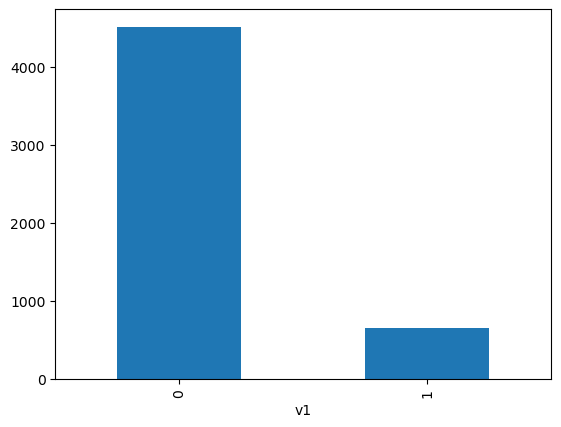

In [28]:
data['v1'].value_counts().plot(kind='bar')
plt.show()

In [30]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [31]:
print(f'Ham Mail : ', round(data['v1'].value_counts()[0]/len(data)*100, 3), '%')
print('Spam Mail : ', round(data['v1'].value_counts()[1]/len(data)*100, 3), '%')

Ham Mail :  87.367 %
Spam Mail :  12.633 %


In [32]:
X_data = data['v2']
y_data = data['v1']

print(len(X_data), len(y_data))

5169 5169


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data) # stratify : 비율조정

In [35]:
print('Ham Mail : ', round(y_test.value_counts()[0]/len(y_test)*100, 3), '%')
print('Spam Mail : ', round(y_test.value_counts()[1]/len(y_test)*100, 3), '%')

Ham Mail :  87.331 %
Spam Mail :  12.669 %


In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [37]:
X_train_encoded[0]

[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180]

In [38]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'for': 11, 'my': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, '2': 17, 'that': 18, 'call': 19, 'on': 20, 'are': 21, 'now': 22, 'so': 23, 'not': 24, 'but': 25, 'can': 26, "i'm": 27, 'or': 28, 'at': 29, 'do': 30, 'get': 31, 'will': 32, 'if': 33, 'we': 34, 'be': 35, 'just': 36, 'ur': 37, 'with': 38, 'no': 39, 'this': 40, 'up': 41, 'gt': 42, 'lt': 43, 'how': 44, 'when': 45, 'ok': 46, '4': 47, 'from': 48, 'out': 49, 'go': 50, 'what': 51, 'all': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'then': 57, 'good': 58, 'time': 59, 'come': 60, 'was': 61, 'am': 62, 'he': 63, 'its': 64, 'day': 65, 'there': 66, 'want': 67, 'text': 68, 'only': 69, 'love': 70, 'going': 71, 'send': 72, 'lor': 73, 'one': 74, 'by': 75, 'home': 76, 'as': 77, 'need': 78, 'still': 79, 'txt': 80, 'see': 81, 'about': 82, 'r': 83, 'stop': 84, 'our': 85, 'da': 86, "i'll": 87, 'take': 88, 'reply': 89, 'think': 90, 'sorry': 91, 'bac

In [40]:
threshold = 2 # 회귀 단어의 기준
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 회귀 단어의 수
total_freq = 0 # 전체 단어 빈도수의 총합
rare_freq = 0 # 회귀 단어 빈도수의 총합

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt += 1
        rare_freq += value

print('통장 빈도가 %d번 이하인 회귀 단어 수 : %d' %(threshold - 1, rare_cnt))
print('단어 집합에서 회귀 단어의 비율 : ', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 회귀 단어 등장 빈도 비율 : ', (rare_freq/total_freq)*100)

통장 빈도가 1번 이하인 회귀 단어 수 : 4329
단어 집합에서 회귀 단어의 비율 :  55.39347408829175
전체 등장 빈도에서 회귀 단어 등장 빈도 비율 :  6.747930728103128


In [41]:
vocab_size = len(word_to_index) + 1
print('전체 단어 집합의 크기 : ', vocab_size)

전체 단어 집합의 크기 :  7816


In [76]:
print(X_train_encoded)

[[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180], [556, 23, 218, 752, 316], [12, 854, 583, 61, 24, 397, 2, 16, 1160, 30, 3, 67, 1160, 74, 65], [127, 37, 619, 620, 621, 17, 113, 62, 3489, 12, 142, 925, 4, 3490, 15, 3491, 855, 8, 38, 4, 3492, 201, 60, 1018, 33, 3, 55], [3493, 1335, 22, 2318], [304, 213, 663, 160, 8, 160, 77, 123, 77, 4, 1802, 8, 3494, 28, 557, 5, 512, 9], [46, 558, 181, 6, 584, 139, 492, 140], [166, 294, 57, 108, 24, 71, 76, 47, 316], [424, 1336, 1019, 622, 623], [84, 664, 624, 512, 1, 339, 16, 1161, 12, 1803, 1162, 2, 267, 1, 268, 35, 1804, 3495, 513, 33, 1, 31, 74, 121, 19, 27, 24, 3496, 20, 753], [63, 699, 24, 2, 100, 97, 74, 33, 23, 754, 11, 10, 94, 94, 94], [1, 2319, 3, 21, 4, 514, 379, 7, 27, 276, 24, 2, 35, 4, 1163, 1, 16, 2, 31, 124, 1337, 1518, 5, 142, 7, 57, 248, 5, 1519, 30, 16, 4, 559, 65], [277, 340, 2, 1805, 3497, 6, 32, 35, 1164, 1806, 15, 52, 5, 398, 625, 7, 1807, 1520, 665, 72, 31, 2320, 84, 2, 2321], [145, 34, 21, 1808, 117], [2322, 37, 3498, 3499, 1

In [77]:
total = 0

for i in range(len(X_train_encoded)):
    total += len(X_train_encoded[i])


print(total)
print(total / len(X_train_encoded))
print(len(X_train_encoded[0]))

64153
15.514631197097945
11


In [78]:
total_len = []

for i in range(len(X_train_encoded)):
    total_len.append(len(X_train_encoded[i]))

np.mean(total_len)

15.514631197097945

In [79]:
np.mean([len(x) for x in X_train_encoded])

15.514631197097945

In [80]:
# 패딩
max_len = 20
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 20)

In [81]:
# 모델 작업
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [82]:
embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          250112    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 255297 (997.25 KB)
Trainable params: 255297 (997.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [88]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [90]:
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
27/52 [==============>...............] - ETA: 0s - loss: 0.0191 - acc: 0.9965
Epoch 1: val_acc did not improve from 0.98670
52/52 [==============================] - 0s 3ms/step - loss: 0.0159 - acc: 0.9967 - val_loss: 0.0430 - val_acc: 0.9867
Epoch 2/20
52/52 [==============================] - ETA: 0s - loss: 0.0109 - acc: 0.9982
Epoch 2: val_acc did not improve from 0.98670
52/52 [==============================] - 0s 2ms/step - loss: 0.0109 - acc: 0.9982 - val_loss: 0.0427 - val_acc: 0.9867
Epoch 3/20
26/52 [==============>...............] - ETA: 0s - loss: 0.0067 - acc: 0.9988
Epoch 3: val_acc did not improve from 0.98670
52/52 [==============================] - 0s 2ms/step - loss: 0.0076 - acc: 0.9988 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 4/20
27/52 [==============>...............] - ETA: 0s - loss: 0.0040 - acc: 1.0000
Epoch 4: val_acc did not improve from 0.98670
52/52 [==============================] - 0s 2ms/step - loss: 0.0056 - acc: 0.9997 - val_loss: 0.0439 - 

In [91]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=130)

In [92]:
print('test acc : ', model.evaluate(X_test_padded, y_test)[1])

33/33 [==============================] - 0s 1ms/step - loss: 0.1185 - acc: 0.9681
test acc :  0.9680851101875305


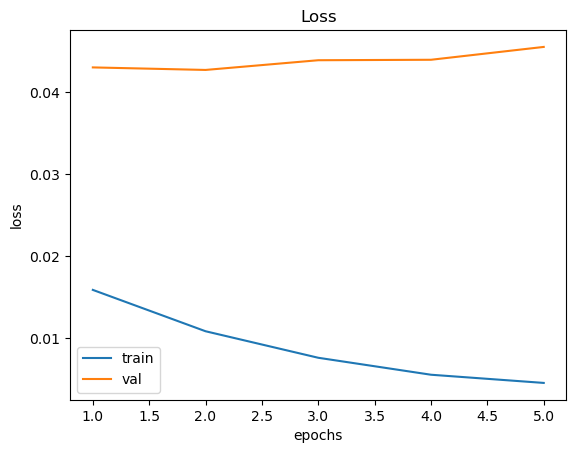

In [94]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()

In [111]:
embedding_dim = 32
dropout_ratio = 0.5
num_filters = 64
kernel_size = 5

In [112]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(10, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

In [113]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          250112    
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          10304     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                      

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [116]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [117]:
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
50/52 [===========================>..] - ETA: 0s - loss: 0.6463 - acc: 0.7975
Epoch 1: val_acc improved from -inf to 0.87908, saving model to best_model.h5
52/52 [==============================] - 0s 4ms/step - loss: 0.6419 - acc: 0.7993 - val_loss: 0.4922 - val_acc: 0.8791
Epoch 2/20
46/52 [=========================>....] - ETA: 0s - loss: 0.3810 - acc: 0.8648
Epoch 2: val_acc did not improve from 0.87908
52/52 [==============================] - 0s 3ms/step - loss: 0.3805 - acc: 0.8646 - val_loss: 0.2177 - val_acc: 0.8791
Epoch 3/20
37/52 [====================>.........] - ETA: 0s - loss: 0.3130 - acc: 0.8843
Epoch 3: val_acc improved from 0.87908 to 0.96977, saving model to best_model.h5
52/52 [==============================] - 0s 4ms/step - loss: 0.2946 - acc: 0.9021 - val_loss: 0.1638 - val_acc: 0.9698
Epoch 4/20
52/52 [==============================] - ETA: 0s - loss: 0.2233 - acc: 0.9604
Epoch 4: val_acc improved from 0.96977 to 0.98065, saving model to best_model.h5
5

In [118]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=130)

In [119]:
print('test acc : ', model.evaluate(X_test_padded, y_test)[1])

33/33 [==============================] - 0s 2ms/step - loss: 0.1088 - acc: 0.9758
test acc :  0.9758220314979553


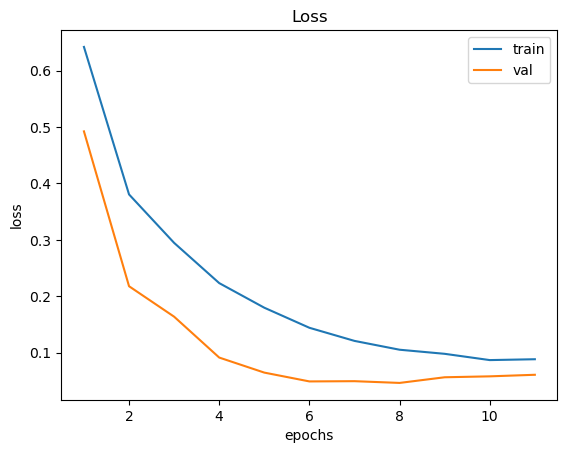

In [120]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()